Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


# HIERARCHICAL CLUSTERING

Importing hierarchical clustering libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering 

Reading the dataset

In [2]:
crime_data=pd.read_csv(r"C:\Users\Sujal Sahu\Downloads\crime_data.csv")
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime_data.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


Normalization function

In [4]:
from sklearn.preprocessing import MinMaxScaler
normalize=MinMaxScaler()
new_df=normalize.fit_transform(crime_data.iloc[:,1:].to_numpy())
df_norm=pd.DataFrame(new_df,columns=crime_data.columns[1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


Creating dendrogram

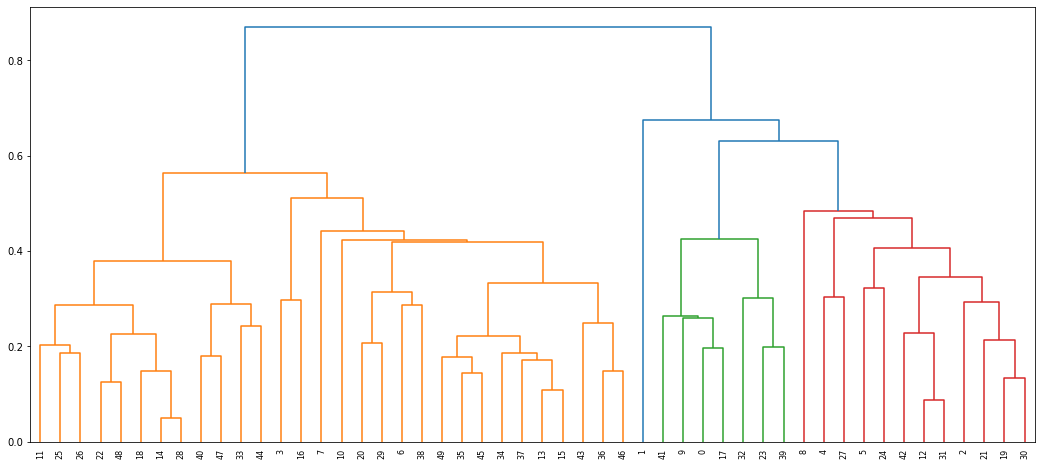

In [5]:
plt.figure(figsize=(18,8))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

Creating clusters

In [6]:
hc=AgglomerativeClustering(n_clusters=4,
                          affinity='euclidean',
                          linkage='average')

In [7]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [8]:
clusters=pd.DataFrame(y_hc,columns=['Clusters'])
clusters

,Clusters
0,3
1,2
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [9]:
df_norm['h_clusterid']=clusters
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,2
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1
5,0.427711,0.544521,0.779661,0.811370,1
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,1
9,1.000000,0.568493,0.474576,0.478036,3


In [10]:
df_norm.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
49,0.361446,0.397260,0.474576,0.214470,0
28,0.078313,0.041096,0.406780,0.056848,0
34,0.391566,0.256849,0.728814,0.364341,0
26,0.210843,0.195205,0.508475,0.237726,0
25,0.313253,0.219178,0.355932,0.235142,0
48,0.108434,0.027397,0.576271,0.090439,0
35,0.349398,0.363014,0.610169,0.328165,0
22,0.114458,0.092466,0.576271,0.196382,0
36,0.246988,0.390411,0.593220,0.568475,0
20,0.216867,0.356164,0.898305,0.232558,0


In [11]:
crime_data['h_clusterid']=clusters
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [12]:
crime_data.sort_values("h_clusterid")

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
49,Wyoming,6.8,161,60,15.6,0
28,New Hampshire,2.1,57,56,9.5,0
34,Ohio,7.3,120,75,21.4,0
26,Nebraska,4.3,102,62,16.5,0
25,Montana,6.0,109,53,16.4,0
48,Wisconsin,2.6,53,66,10.8,0
35,Oklahoma,6.6,151,68,20.0,0
22,Minnesota,2.7,72,66,14.9,0
36,Oregon,4.9,159,67,29.3,0
20,Massachusetts,4.4,149,85,16.3,0


# K MEANS CLUSTERING

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [14]:
crime_data=pd.read_csv(r"C:\Users\Sujal Sahu\Downloads\crime_data.csv")
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [16]:
#Normalization function
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_crime_data_df=scaler.fit_transform(crime_data.iloc[:,1:])
scaled_crime_data_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [17]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(scaled_crime_data_df)

C:\Users\Sujal Sahu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [18]:
kmeans.inertia_

57.55425863091104

In [21]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score

wcss=[]
sil_score=[]
cal_haz_score=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_data_df)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue
    sil_score.append(silhouette_score(scaled_crime_data_df,kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(scaled_crime_data_df,kmeans.labels_))

C:\Users\Sujal Sahu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sujal Sahu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sujal Sahu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sujal Sahu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a m

In [22]:
wcss

[200.0,
 104.96163315756871,
 80.0888613219962,
 57.55425863091104,
 50.52026552535068,
 43.92746404497574,
 40.52183461131976,
 34.6873883978491,
 32.70648136388185,
 28.311639397122555]

In [24]:
sil_score

[]

In [25]:
cal_haz_score

[]

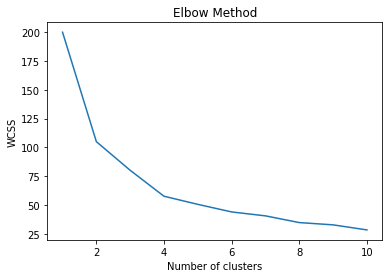

In [26]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [28]:
clusters_new=KMeans(6,random_state=42)
clusters_new.fit(scaled_crime_data_df)

C:\Users\Sujal Sahu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [29]:
clusters_new.labels_

array([4, 0, 2, 1, 2, 2, 5, 1, 2, 4, 5, 3, 2, 1, 3, 1, 1, 4, 3, 2, 5, 2,
       3, 4, 2, 1, 1, 2, 3, 5, 2, 2, 4, 3, 5, 1, 1, 5, 5, 4, 3, 4, 2, 5,
       3, 1, 5, 3, 3, 1])

In [30]:
crime_data["clusterid_new"]=clusters_new.labels_
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,5
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,4


In [31]:
clusters_new.cluster_centers_

array([[ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [-0.23125052, -0.30342672, -0.27242367, -0.23973789],
       [ 0.71788585,  1.04432228,  0.89281033,  1.18827715],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.65691529, -0.54927896,  1.01687638, -0.37133511]])

In [32]:
crime_data.groupby("clusterid_new").mean()

,Murder,Assault,UrbanPop,Rape
clusterid_new,,,,
0,10.000000,263.000000,48.000000,44.500000
1,6.790909,145.727273,61.636364,19.009091
2,10.883333,256.916667,78.333333,32.250000
3,2.680000,70.100000,51.000000,10.910000
4,14.671429,251.285714,54.285714,21.685714
5,4.955556,125.444444,80.111111,17.788889


In [33]:
crime_data[crime_data["clusterid_new"]==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
1,Alaska,10.0,263,48,44.5,0


In [34]:
crime_data[crime_data["clusterid_new"]==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
3,Arkansas,8.8,190,50,19.5,1
7,Delaware,5.9,238,72,15.8,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
25,Montana,6.0,109,53,16.4,1
26,Nebraska,4.3,102,62,16.5,1
35,Oklahoma,6.6,151,68,20.0,1
36,Oregon,4.9,159,67,29.3,1
45,Virginia,8.5,156,63,20.7,1


In [35]:
crime_data[crime_data["clusterid_new"]==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
24,Missouri,9.0,178,70,28.2,2
27,Nevada,12.2,252,81,46.0,2
30,New Mexico,11.4,285,70,32.1,2


In [36]:
crime_data[crime_data["clusterid_new"]==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
18,Maine,2.1,83,51,7.8,3
22,Minnesota,2.7,72,66,14.9,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3
44,Vermont,2.2,48,32,11.2,3
47,West Virginia,5.7,81,39,9.3,3
48,Wisconsin,2.6,53,66,10.8,3


In [37]:
crime_data[crime_data["clusterid_new"]==4]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,4
9,Georgia,17.4,211,60,25.8,4
17,Louisiana,15.4,249,66,22.2,4
23,Mississippi,16.1,259,44,17.1,4
32,North Carolina,13.0,337,45,16.1,4
39,South Carolina,14.4,279,48,22.5,4
41,Tennessee,13.2,188,59,26.9,4


In [38]:
crime_data[crime_data["clusterid_new"]==5]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
6,Connecticut,3.3,110,77,11.1,5
10,Hawaii,5.3,46,83,20.2,5
20,Massachusetts,4.4,149,85,16.3,5
29,New Jersey,7.4,159,89,18.8,5
34,Ohio,7.3,120,75,21.4,5
37,Pennsylvania,6.3,106,72,14.9,5
38,Rhode Island,3.4,174,87,8.3,5
43,Utah,3.2,120,80,22.9,5
46,Washington,4.0,145,73,26.2,5


In [39]:
crime_data.sort_values("clusterid_new")

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
1,Alaska,10.0,263,48,44.5,0
49,Wyoming,6.8,161,60,15.6,1
45,Virginia,8.5,156,63,20.7,1
3,Arkansas,8.8,190,50,19.5,1
15,Kansas,6.0,115,66,18.0,1
36,Oregon,4.9,159,67,29.3,1
35,Oklahoma,6.6,151,68,20.0,1
7,Delaware,5.9,238,72,15.8,1
16,Kentucky,9.7,109,52,16.3,1
13,Indiana,7.2,113,65,21.0,1


In [40]:
crime_data["clusterid_new"].value_counts()

2    12
1    11
3    10
5     9
4     7
0     1
Name: clusterid_new, dtype: int64

In [42]:
crime_data.groupby(["clusterid_new"])["Unnamed: 0"].apply(lambda x: tuple(x))

clusterid_new
0                                            (Alaska,)
1    (Arkansas, Delaware, Indiana, Kansas, Kentucky...
2    (Arizona, California, Colorado, Florida, Illin...
3    (Idaho, Iowa, Maine, Minnesota, New Hampshire,...
4    (Alabama, Georgia, Louisiana, Mississippi, Nor...
5    (Connecticut, Hawaii, Massachusetts, New Jerse...
Name: Unnamed: 0, dtype: object

# DBSCAN

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [44]:
crime_data=pd.read_csv(r"C:\Users\Sujal Sahu\Downloads\crime_data.csv")
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [47]:
crime_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [48]:
crime_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [49]:
crime_data.shape

(50, 4)

In [50]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [51]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


<AxesSubplot:>

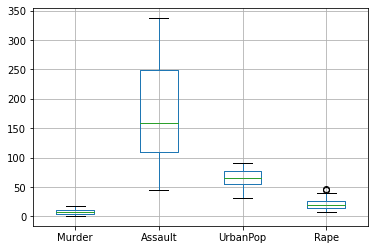

In [52]:
crime_data.boxplot()

<AxesSubplot:>

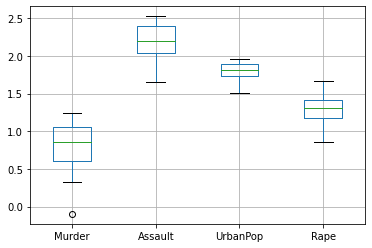

In [53]:
crime_data.apply(np.log10).boxplot()

In [54]:
array=crime_data.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [55]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)

In [56]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [102]:
dbscan=DBSCAN(eps=0.6,min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.6, min_samples=3)

In [103]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  0, -1,
       -1,  1,  2, -1,  2, -1, -1, -1, -1,  0, -1,  1, -1,  2, -1, -1, -1,
       -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1],
      dtype=int64)

In [104]:
cl=pd.DataFrame(dbscan.labels_, columns=["cluster"])

In [105]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [108]:
clustered=pd.concat([crime_data,cl],axis=1)
clustered

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [109]:
clustered[clustered["cluster"]==-1]

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [110]:
clustered.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
cluster      -0.580
dtype: float64

In [111]:
clustered.sort_values("cluster")

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
48,2.6,53,66,10.8,-1
25,6.0,109,53,16.4,-1
27,12.2,252,81,46.0,-1
29,7.4,159,89,18.8,-1
31,11.1,254,86,26.1,-1
32,13.0,337,45,16.1,-1
33,0.8,45,44,7.3,-1
34,7.3,120,75,21.4,-1
23,16.1,259,44,17.1,-1
